In [92]:
import pandas as pd
import matplotlib.pyplot as plt
import json
import sklearn.model_selection as sk
from models.vgg_16 import vgg16
from sklearn.preprocessing import OneHotEncoder
import numpy as np

In [107]:
df=pd.read_csv('/home/sri/education/Cassava-Leaf-Disease-Classification/data/train.csv')

df['image_id']='/media/sri/shared/SEM-8/cassava leaf disease classification/train_images/'+df['image_id']

data=df['label'].value_counts(ascending=True)
x=data.index.values.tolist()
y=data.values.tolist()

df.head()

,image_id,label
0,/media/sri/shared/SEM-8/cassava leaf disease c...,0
1,/media/sri/shared/SEM-8/cassava leaf disease c...,3
2,/media/sri/shared/SEM-8/cassava leaf disease c...,1
3,/media/sri/shared/SEM-8/cassava leaf disease c...,1
4,/media/sri/shared/SEM-8/cassava leaf disease c...,3


### Count plot function

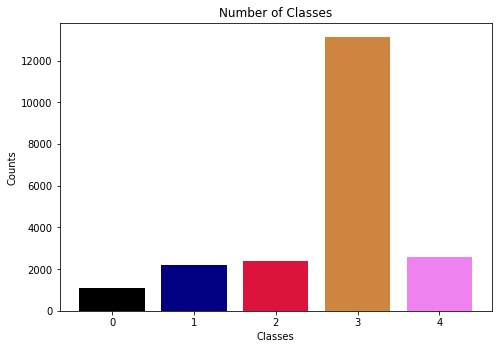

In [94]:
def count_plot(x,y):
    
    '''x: list of x-values
       y: list of y-values
       
       returns: show the count plot diagram'''
    
    fig=plt.figure()
    ax=fig.add_axes([0,0,1,1])
    ax.bar(x,y,color=['black','navy','crimson','violet','peru'])
    ax.set_xlabel('Classes')
    ax.set_ylabel('Counts')
    ax.set_title('Number of Classes')
    
count_plot(x,y)

### Reducing the dominant class by  40%  to balance the dataset

In [95]:
class_3=df[df.label==3].loc[:int(0.3*21397)]
other_class=df[df.label!=3]
class_3

,image_id,label
1,1000201771.jpg,3
4,1000812911.jpg,3
5,1000837476.jpg,3
9,1001742395.jpg,3
10,1001749118.jpg,3
...,...,...
6413,2150392038.jpg,3
6414,2150406389.jpg,3
6416,2150679320.jpg,3
6418,2151059050.jpg,3


In [96]:
frames=[other_class,class_3]
k=pd.concat(frames,ignore_index=True).sample(frac=1.0,random_state=45).reset_index(drop=True)

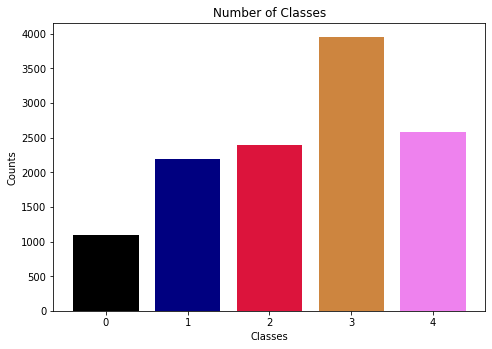

In [97]:
x_data=k['image_id'].values.tolist()
y_data=k['label'].values.tolist()
count_plot(x,k['label'].value_counts(ascending=True).values.tolist())

###  SPLITTING THE DATA INTO TRAIN AND  TEST

In [98]:
train_x, val_x, train_y, val_y = sk.train_test_split(x_data,y_data,test_size=0.33, random_state=42)
print('Training data:', len(train_x) )
print('Training Label:', len(train_y))
print('Validation Data:',len(val_x))
print('Validation Label:', len(val_y))

Training data: 8171
Training Label: 8171
Validation Data: 4026
Validation Label: 4026


### Add 70% of deleted 3rd class data to validation data

In [99]:
remaining_data=df[df['label']==3].loc[int(0.3*21397)+1:]
val1_x=remaining_data['image_id'].values.tolist()
val1_y=remaining_data['label'].values.tolist()

In [100]:
val_x=val_x+val1_x
val_y=val_y+val1_y

In [101]:
print('Training data:', len(train_x) )
print('Training Label:', len(train_y))
print('Validation Data:',len(val_x))
print('Validation Label:', len(val_y))
print('-------------------------------------------')
print('Total Data:', len(train_x)+len(val_x))

Training data: 8171
Training Label: 8171
Validation Data: 13226
Validation Label: 13226
-------------------------------------------
Total Data: 21397


### Encode categorical Features as one hot numeric array

In [102]:
from sklearn.preprocessing import OneHotEncoder

def convert_to_OneHotEncoder(data):
    enc=OneHotEncoder(handle_unknown='ignore')
    data1=np.array(data).reshape(-1,1)
    data1=enc.fit_transform(data1).toarray()
    print('shape of the One Hot Numeric Matrix:',data1.shape)
    return data1

In [103]:
train_y=convert_to_OneHotEncoder(train_y)
val_y=convert_to_OneHotEncoder(val_y)

shape of the One Hot Numeric Matrix: (8171, 5)
shape of the One Hot Numeric Matrix: (13226, 5)


### VGG_16 Model

In [60]:
models = vgg16(img_input=(560, 560, 3),
               path_url='https://github.com/fchollet/deep-learning-models/releases/download/v0.1/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5',
               path_to_save_h5_file='/media/sri/shared/SEM-8/cassava leaf disease classification/vgg16_without_top.h5')


Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 560, 560, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 560, 560, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 560, 560, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 280, 280, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 280, 280, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 280, 280, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 140, 140, 128)     0     